In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sn
from IPython.display import Image
import graphviz
from graphviz import Digraph
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from matplotlib.ticker import MaxNLocator 

In [2]:
#read features from csv file
df = pd.read_csv('features.csv')
df.set_index('filename', inplace=True)

In [3]:
#label encoding
genre_list = df['genre']
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
# y = df['genre']

#scaling the features
# scaler = StandardScaler()
# X = scaler.fit_transform(np.array(df.iloc[:, 2:], dtype=float))
X = df.iloc[:, 1:]

#training/testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Max Depth, Training, Test
1 0.8200000000000001 0.84
2 0.71625 0.74
3 0.62 0.72
4 0.51125 0.635
5 0.4375 0.625
6 0.37 0.605
7 0.28125 0.5449999999999999
8 0.18625000000000003 0.52
Precision: 48.000%
Recall: 48.000%
Accuracy: 48.000%
Predicted values:
 [3 9 9 5 4 7 3 4 1 9 0 3 3 2 6 7 4 1 2 7 5 6 7 3 6 3 7 8 6 7 4 7 1 6 5 3 1
 3 4 2 2 3 5 2 5 8 3 2 1 7 2 6 5 2 7 3 4 2 3 6 8 5 0 5 1 5 7 6 7 1 2 8 6 2
 0 0 6 8 6 2 8 3 3 3 3 7 6 2 1 9 2 7 4 4 2 4 4 1 3 8 8 3 3 7 7 5 3 3 6 2 8
 4 0 1 3 2 3 3 9 5 5 0 7 3 4 6 7 0 2 3 8 6 8 7 4 8 7 1 1 0 2 2 0 8 5 2 6 7
 9 6 4 7 0 2 0 8 6 5 3 2 0 7 1 4 3 3 8 2 2 2 2 5 2 1 8 0 9 4 6 1 2 0 9 2 8
 0 5 5 2 2 4 8 1 3 3 1 4 1 2 9]


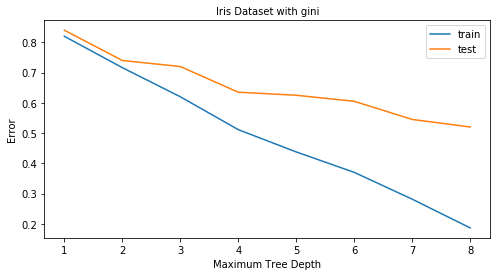

1 0.81 0.8200000000000001
2 0.6912499999999999 0.7
3 0.56875 0.6599999999999999
4 0.505 0.6
5 0.395 0.5700000000000001
6 0.275 0.5700000000000001
7 0.16625 0.525
8 0.08625000000000005 0.505
Precision: 49.500%
Recall: 49.500%
Accuracy: 49.500%
Predicted values:
 [3 6 4 2 3 7 3 4 1 7 0 7 4 2 6 2 4 1 5 5 3 6 7 0 6 9 3 4 0 3 8 7 1 6 9 2 1
 3 4 7 8 6 9 2 6 8 9 2 1 4 9 9 5 2 3 4 8 2 2 6 0 3 9 5 1 5 7 4 7 5 2 0 6 0
 0 0 6 8 6 2 2 6 4 4 8 8 6 9 1 7 2 7 4 9 9 4 0 9 2 4 8 9 3 3 7 2 3 9 6 4 8
 4 0 1 5 2 7 9 9 1 9 9 7 3 3 6 8 0 9 7 5 6 8 4 4 7 7 1 9 3 3 3 9 8 2 9 6 7
 9 6 4 7 8 6 3 9 3 1 8 2 3 4 1 6 7 3 4 2 9 0 2 5 2 1 7 1 3 4 6 1 2 6 0 2 8
 0 0 5 2 2 3 4 1 7 9 1 7 1 2 3]


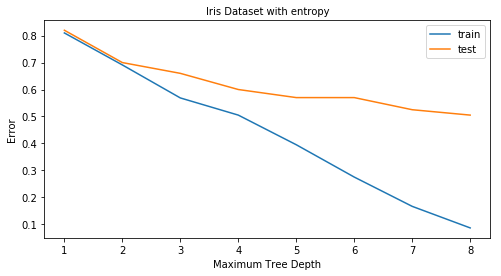

In [4]:
# Fit for various depth trees
MaxDepth =  8

print ('Max Depth, Training, Test')
impurity_type = ['gini', 'entropy']

for i, impurity in enumerate(impurity_type):
    Errors = np.zeros((MaxDepth,2))
    for j in range(0, MaxDepth):
        tree = DecisionTreeClassifier(criterion=impurity, max_depth=j+1, random_state=666)
        tree.fit(X_train, y_train)

        X_combined = np.vstack((X_train, X_test))
        y_combined = np.hstack((y_train, y_test))

        # optional outputs
        z = tree.apply(X_combined)
        #print(z)
        dp = tree.decision_path(X_combined)
        #print (dp)

        Errors[j,0] = 1 - tree.score(X_train,y_train)
        Errors[j,1] = 1 - tree.score(X_test,y_test)
        print(j+1,Errors[j,0],Errors[j,1])
        # plot the final decision gree
        export_graphviz(tree, out_file='T_{}.dot'.format(impurity), feature_names=X.columns)

    y_pred = tree.predict(X_test)
    print('Precision: {0:.3f}%'.format(metrics.precision_score(y_test, y_pred, average='micro') * 100))
    print('Recall: {0:.3f}%'.format(metrics.recall_score(y_test, y_pred, average='micro') * 100))
    print('Accuracy: {0:.3f}%'.format(metrics.accuracy_score(y_test, y_pred) * 100))
    print('Predicted values:\n {}'.format(y_pred))
    
    # plot errors by tree depth    
    plt.close('all')
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
    ax.set_xlabel('Maximum Tree Depth')
    ax.set_ylabel('Error')
    ax.set_title('Iris Dataset with {}'.format(impurity), fontsize ='medium')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
    ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
    ax.legend(loc='upper right', fontsize='medium')
    plt.show() 
    

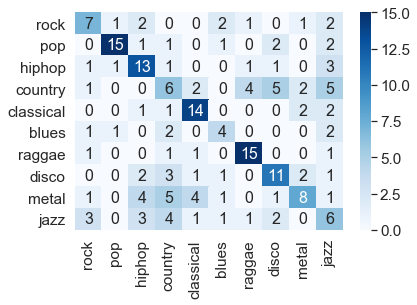

In [5]:
#confusion matrix using seaborn and matplotlib
#found on stackoverflow https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
genres = ['rock', 'pop', 'hiphop', 'country', 'classical', 'blues', 'raggae', 'disco', 'metal', 'jazz']

#create confusion matrix using scikitlearn.metrics
cm = metrics.confusion_matrix(y_test, y_pred)

#create a dataframe confusion matric
df_cm = pd.DataFrame(cm, genres,
                  genres)
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap="Blues")# font size

In [6]:
#classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.44      0.45        16
           1       0.83      0.68      0.75        22
           2       0.50      0.62      0.55        21
           3       0.25      0.24      0.24        25
           4       0.61      0.70      0.65        20
           5       0.40      0.40      0.40        10
           6       0.68      0.79      0.73        19
           7       0.50      0.52      0.51        21
           8       0.53      0.32      0.40        25
           9       0.24      0.29      0.26        21

   micro avg       0.49      0.49      0.49       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.50      0.49      0.49       200



In [7]:
dot_data = tree.export_graphviz(tree, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("iris") 

AttributeError: 'DecisionTreeClassifier' object has no attribute 'export_graphviz'